In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# Any results you write to the current directory are saved as output.

In [19]:
from keras.datasets import mnist

In [20]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

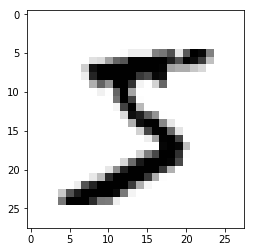

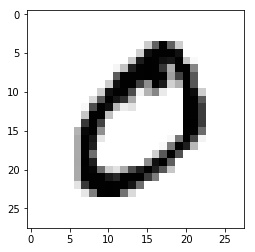

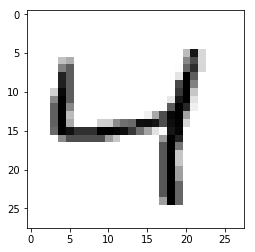

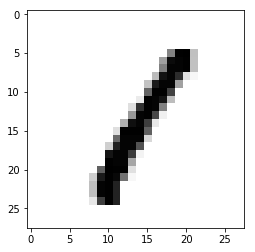

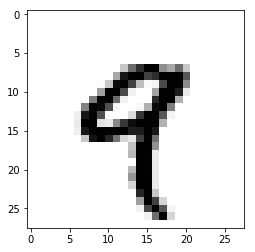

In [21]:
import matplotlib.pyplot as plt
for item in range(5):
    digit = train_images[item]
    plt.imshow(digit, cmap=plt.cm.binary)
    plt.show()

In [22]:
train_images.shape

(60000, 28, 28)

In [23]:
train_labels = np.array([x for x in map(lambda x: 1 if x %2 == 0 else 0, train_labels)])
test_labels = np.array([x for x in map(lambda x: 1 if x %2 == 0 else 0, test_labels)])

In [24]:
train_labels

array([0, 1, 1, ..., 0, 1, 1])

In [7]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [25]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(784, activation='relu'))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(2, activation='softmax'))

In [26]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [27]:
train_images = train_images.reshape((60000, 28 * 28))

In [28]:
train_images = train_images.astype('float32')/ 255

In [29]:
test_images = test_images.reshape(10000, 28 * 28)

In [30]:
test_images = test_images.astype('float32')/255

In [31]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [32]:
network.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 5s 92us/step - loss: 0.1274 - acc: 0.9506
Epoch 2/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0514 - acc: 0.9825
Epoch 3/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0365 - acc: 0.9876
Epoch 4/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0285 - acc: 0.9905
Epoch 5/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0221 - acc: 0.9931
Epoch 6/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.0177 - acc: 0.9945
Epoch 7/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0130 - acc: 0.9959
Epoch 8/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0106 - acc: 0.9968
Epoch 9/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0095 - acc: 0.9972
Epoch 10/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0078 - acc: 0.9978

In [33]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Test accuracy: ' + str(test_acc))

10000/10000 [==============================] - 1s 56us/step
Test accuracy: 0.9897


In [41]:
# Create an HTML canvas to evaluate the model
from IPython.display import HTML
import cv2
import numpy as np
import base64

def classify(img):
    img = base64.b64decode(img[len('data:image/png;base64,'):])
    img = cv2.imdecode(np.fromstring(img, np.uint8),-1)
    img = cv2.resize(img[:,:,3], (28,28))
    img = img.reshape((1,784)).astype(np.float32)/255
    return network.predict_classes(img)[0]

HTML(filename = "mnist.html")

In [34]:
network.predict_proba(np.random.rand(1,784))

array([[0., 1.]], dtype=float32)

In [40]:
network.predict_classes(test_images[0].reshape((1,784)).astype(np.float32)/255)[0]

1